# Question no 1 

## 1). Graph Representation:

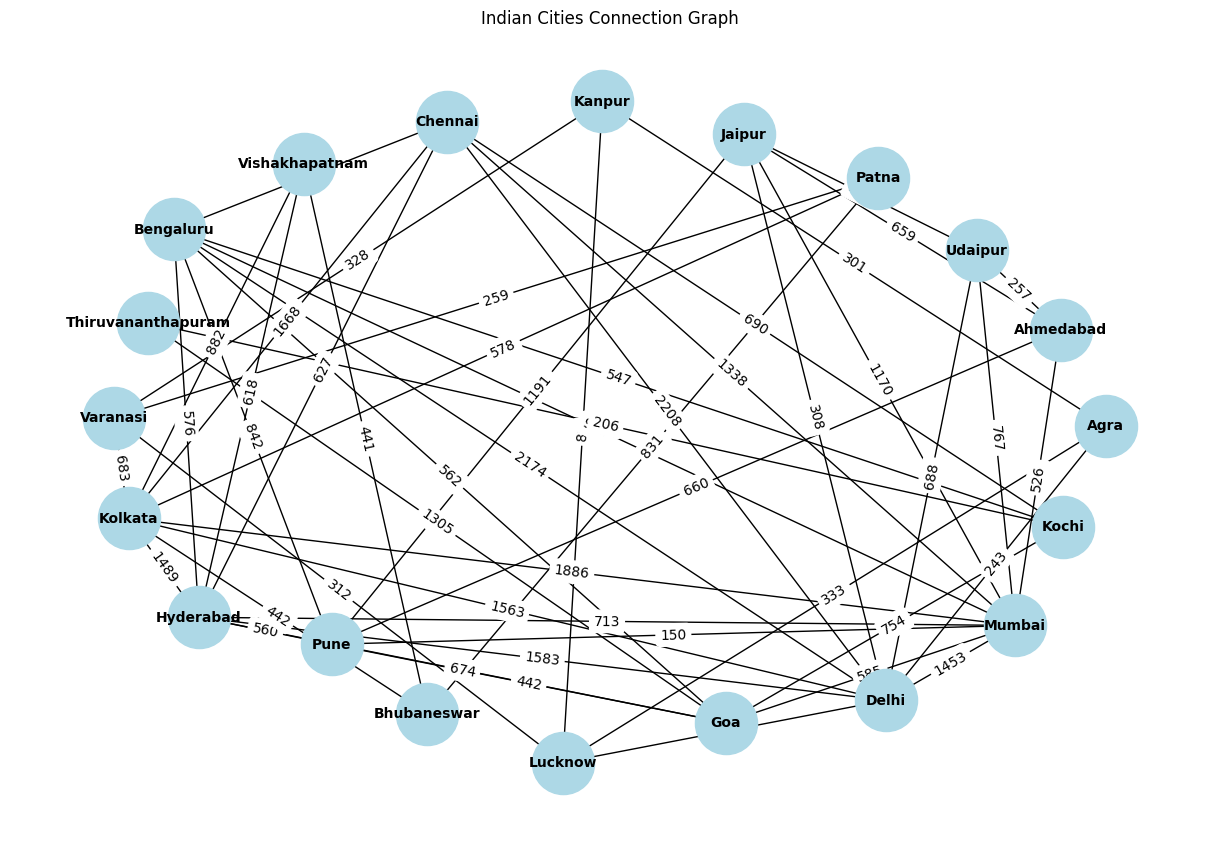

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file = 'indian-cities-dataset.csv'
df = pd.read_csv(file)

# Build the graph
cityGraph = nx.Graph()
for _, row in df.iterrows():
    cityGraph.add_edge(row['Origin'], row['Destination'], weight=row['Distance'])

# Visualize the graph with spacing between nodes
def visualize_graph():
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(cityGraph, k=500)  # Adjust k to control spacing
    nx.draw(cityGraph, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')
    edgeLabels = nx.get_edge_attributes(cityGraph, 'weight')
    nx.draw_networkx_edge_labels(cityGraph, pos, edge_labels=edgeLabels)
    plt.title("Indian Cities Connection Graph")
    plt.show()

# Run visualization
visualize_graph()


## 2). Graph Analysis Functions

In [31]:
import networkx as nx



def find_shortest_path(city1, city2):
    if city1 in cityGraph and city2 in cityGraph:
        if nx.has_path(cityGraph, city1, city2):
            path = nx.dijkstra_path(cityGraph, source=city1, target=city2, weight='weight')
            pathLength = nx.dijkstra_path_length(cityGraph, source=city1, target=city2, weight='weight')
            print(f"Shortest path between {city1} and {city2}: {path}")
            print(f"Total distance: {pathLength} km")
        else:
            print(f"No path between {city1} and {city2}.")
    else:
        print(f"One or both cities not in the graph: {city1}, {city2}.")

def find_most_connected_city():
    mostConnectedCity = max(cityGraph.degree, key=lambda x: x[1])
    print(f"City with most connections: {mostConnectedCity[0]} with {mostConnectedCity[1]} connections.")

def calculate_average_shortest_path_length():
    if nx.is_connected(cityGraph):
        avgPathLength = nx.average_shortest_path_length(cityGraph, weight='weight')
        print(f"Average shortest path length: {avgPathLength:.2f} km")
    else:
        print("Graph is not fully connected.")

# Example: User-defined cities for path analysis
city1 = input("Enter the first city: ")
city2 = input("Enter the second city: ")

# Run graph analysis
find_shortest_path(city1, city2)
find_most_connected_city()
calculate_average_shortest_path_length()


Enter the first city:  Bengaluru
Enter the second city:  Kochi


Shortest path between Bengaluru and Kochi: ['Bengaluru', 'Kochi']
Total distance: 547 km
City with most connections: Mumbai with 10 connections.
Average shortest path length: 1567.12 km


## 3). Statistical Calculations

In [36]:
import numpy as np

# Statistical Calculations

def statistical_calculations():
    # Find longest and shortest direct connections
    longestConnection = max(cityGraph.edges(data=True), key=lambda x: x[2]['weight'])
    shortestConnection = min(cityGraph.edges(data=True), key=lambda x: x[2]['weight'])
    print(f"Longest direct connection: {longestConnection[0]} - {longestConnection[1]} ({longestConnection[2]['weight']} km)")
    print(f"Shortest direct connection: {shortestConnection[0]} - {shortestConnection[1]} ({shortestConnection[2]['weight']} km)")

    # Calculate average, median, and standard deviation of distances
    distances = [data['weight'] for _, _, data in cityGraph.edges(data=True)]
    avgDistance = np.mean(distances)
    medianDistance = np.median(distances)
    stdDevDistance = np.std(distances)
    print(f"Average distance: {avgDistance:.2f} km")
    print(f"Median distance: {medianDistance:.2f} km")
    print(f"Standard deviation of distances: {stdDevDistance:.2f} km")

# Run statistical calculations
statistical_calculations()


Longest direct connection: Delhi - Chennai (2208 km)
Shortest direct connection: Lucknow - Kanpur (89 km)
Average distance: 773.33 km
Median distance: 627.00 km
Standard deviation of distances: 513.96 km


## 4). Advanced Operations

In [ ]:
def is_graph_connected():
    isConnected = nx.is_connected(cityGraph)
    print(f"Is the graph fully connected? {'Yes' if isConnected else 'No'}")

def find_all_paths(city1, city2):
    if city1 in cityGraph and city2 in cityGraph:
        if nx.has_path(cityGraph, city1, city2):
            paths = list(nx.all_simple_paths(cityGraph, source=city1, target=city2))
            print(f"All paths between {city1} and {city2}:")
            for path in paths:
                print(path)
        else:
            print(f"No paths between {city1} and {city2}.")
    else:
        print(f"One or both cities not in the graph: {city1}, {city2}.")

def adjacency_matrix():
    adjMatrix = nx.to_numpy_array(cityGraph)  # Updated method to to_numpy_array
    print("Adjacency Matrix:")
    print(pd.DataFrame(adjMatrix, index=cityGraph.nodes, columns=cityGraph.nodes))

# Example: User-defined cities for advanced operations
city1 = input("Enter the first city: ")
city2 = input("Enter the second city: ")

# Run advanced operations
is_graph_connected()
find_all_paths(city1, city2)
adjacency_matrix()



# Question no 2

## 1). Statistical Analysis of Distances:

In [42]:
import pandas as pd
import numpy as np

# Load dataset from file
filePath = 'indian-cities-dataset.csv'  # Ensure the file is in the same folder as this script
cityData = pd.read_csv(filePath)

# Convert distances to NumPy array
distanceArray = cityData['Distance'].to_numpy()

# Compute statistical measures
meanDistance = np.mean(distanceArray)
medianDistance = np.median(distanceArray)
modeDistance = cityData['Distance'].mode()[0]  # Using pandas mode
stdDeviation = np.std(distanceArray)

# Display statistical analysis
print("\n Statistical Analysis of City Distances:")
print(f" Mean Distance: {meanDistance:.2f} km")
print(f" Median Distance: {medianDistance:.2f} km")
print(f" Most Frequent Distance: {modeDistance} km")
print(f" Standard Deviation: {stdDeviation:.2f} km")

# Identify top 5 longest distances
sortedCityData = cityData.sort_values(by='Distance', ascending=False)
top5LongestDistances = sortedCityData.head(5)

# Display top 5 largest distances
print("\n Top 5 Longest City Distances:")
for _, row in top5LongestDistances.iterrows():
    print(f" {row['Origin']} → {row['Destination']}: {row['Distance']} km")



 Statistical Analysis of City Distances:
 Mean Distance: 711.60 km
 Median Distance: 578.00 km
 Most Frequent Distance: 442 km
 Standard Deviation: 477.68 km

 Top 5 Longest City Distances:
 Delhi → Chennai: 2208 km
 Delhi → Bengaluru: 2174 km
 Mumbai → Kolkata: 1886 km
 Kolkata → Chennai: 1668 km
 Chennai → Kolkata: 1666 km


## 2). Data Visualization:

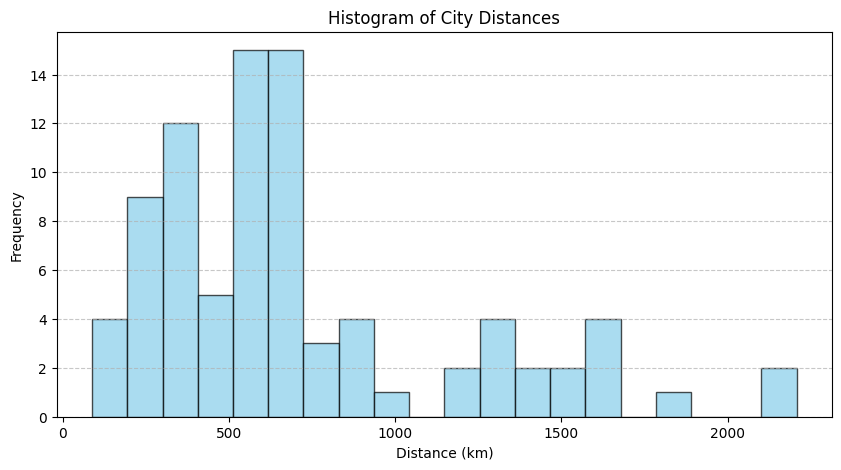

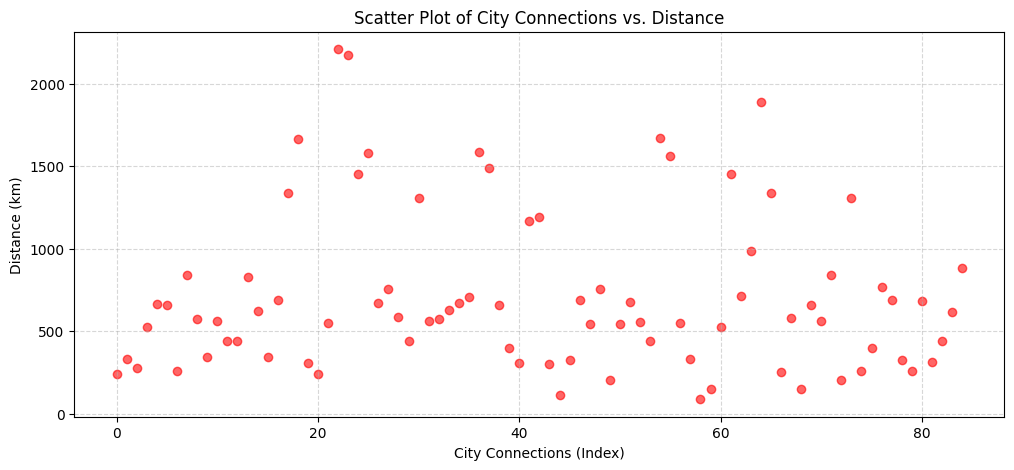

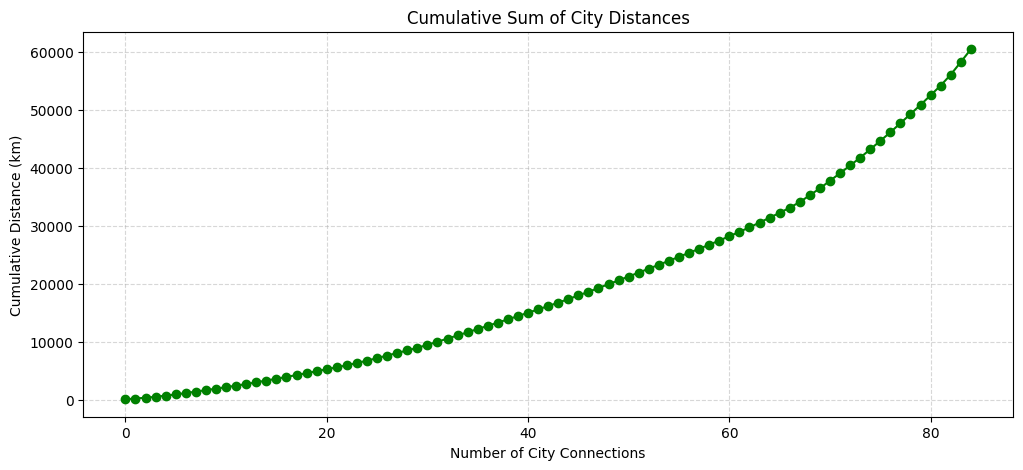

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset from file
filePath = 'indian-cities-dataset.csv'  # Ensure the file is in the same folder as this script
cityData = pd.read_csv(filePath)

# Extract distance values
distances = cityData['Distance']

# 1. Histogram - Distribution of Distances
plt.figure(figsize=(10, 5))
plt.hist(distances, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram of City Distances')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#  2. Scatter Plot - City Connections vs. Distance
plt.figure(figsize=(12, 5))
plt.scatter(range(len(distances)), distances, color='red', alpha=0.6)
plt.xlabel('City Connections (Index)')
plt.ylabel('Distance (km)')
plt.title('Scatter Plot of City Connections vs. Distance')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#  3. Line Plot - Cumulative Sum of Distances
cumulativeDistances = np.cumsum(np.sort(distances))  # Sort for better visualization
plt.figure(figsize=(12, 5))
plt.plot(range(len(cumulativeDistances)), cumulativeDistances, marker='o', linestyle='-', color='green')
plt.xlabel('Number of City Connections')
plt.ylabel('Cumulative Distance (km)')
plt.title('Cumulative Sum of City Distances')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## 3) Data Transformation:

In [3]:
import pandas as pd
import numpy as np

# Load dataset from file
filePath = 'indian-cities-dataset.csv'  # Ensure the file is in the same folder as this script
cityData = pd.read_csv(filePath)

# Extract distance values
distances = cityData['Distance'].to_numpy()

#  1. Min-Max Normalization (Manual Calculation)
minDist = np.min(distances)
maxDist = np.max(distances)
normalizedDistances = (distances - minDist) / (maxDist - minDist)

#  2. Log Transformation (Handling Skewness)
logTransformedDistances = np.log1p(distances)  # log1p(x) = log(x+1) to avoid log(0)

# Create a DataFrame to display results
transformedData = pd.DataFrame({
    'Original Distance': distances,
    'Normalized Distance': normalizedDistances,
    'Log Transformed Distance': logTransformedDistances
})

# Display first 10 transformed values
print("\n Data Transformation Results (First 10 Rows):")
print(transformedData.head(10))



 Data Transformation Results (First 10 Rows):
   Original Distance  Normalized Distance  Log Transformed Distance
0                240             0.071260                  5.484797
1                334             0.115621                  5.814131
2                277             0.088721                  5.627621
3                526             0.206229                  6.267201
4                663             0.270882                  6.498282
5                660             0.269467                  6.493754
6                258             0.079755                  5.556828
7                839             0.353941                  6.733402
8                576             0.229825                  6.357842
9                346             0.121284                  5.849325


# Question no 3

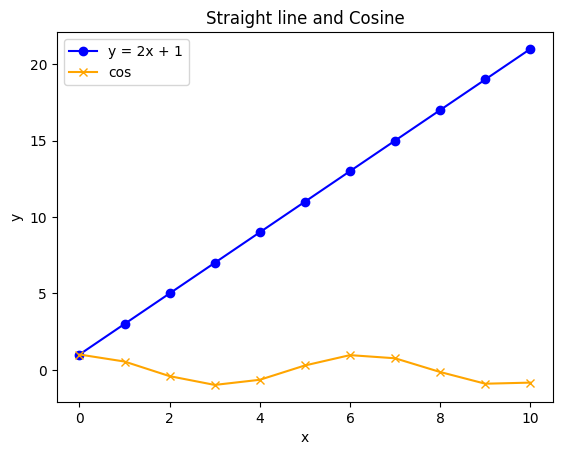

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define x values
x = np.arange(0, 11, 1)

# Define y values
y1 = 2 * x + 1  # Straight line equation
y2 = np.cos(x)  # Cosine function

# Plot the first line with markers
plt.plot(x, y1, marker='o', linestyle='-', color='b', label='y = 2x + 1')

# Plot the second line with different markers
plt.plot(x, y2, marker='x', linestyle='-', color='orange', label='cos')

# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Straight line and Cosine")

# Add legend
plt.legend()

# Show the plot
plt.show()
